In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import warnings
import joblib
import os
warnings.filterwarnings('ignore')

1) here i imported libraries that will be used in this assignment.

In [49]:
data = pd.read_csv("breastCancer.csv")
data.shape
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

2) loading the dataset and checked it's rows and columns.

In [50]:
X , y = data.iloc[:,2:32], data["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 28)

3) here i seprated the dataset into it's features and labels into X and y respectively. then just performing the train_test_split on X and y.

In [51]:
encoder = LabelEncoder() 
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.fit_transform(y_test)

4) here just encoding the orignal labels that were ['B','M'] into [0,1]

In [52]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
scaler = StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)


5) using standardization on X_train and X_test.

In [53]:
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train_encoded)
y_pred = lr.predict(X_test_scaled)
acc = np.sum(y_pred==y_test_encoded)/len(y_test_encoded)
print(acc*100,"%")

95.6140350877193 %


7) appling that logistic regression on scaled data and checking the accuracy.

In [54]:
print(classification_report(y_test_encoded,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       147
           1       0.90      0.99      0.94        81

    accuracy                           0.96       228
   macro avg       0.95      0.96      0.95       228
weighted avg       0.96      0.96      0.96       228



8) here is the classification report of scaled data.

<Axes: >

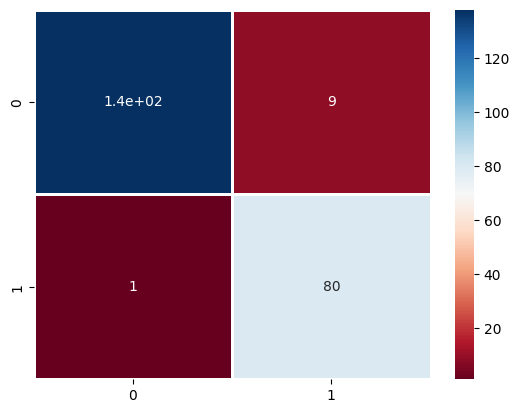

In [55]:
preprocessed_data = confusion_matrix (y_test_encoded, y_pred)
sns.heatmap(preprocessed_data,annot=True, cmap='RdBu', linewidths=.9)

9) simply using a confussion matrix and then applying heatmap to see the accuracy of logistic regression model on scaled data.

In [56]:
lr2 = LogisticRegression()
lr2.fit(X_train,y_train_encoded)
y_pred2= lr2.predict(X_test)
acc2= np.sum(y_pred2==y_test_encoded)/len(y_test_encoded)
print(acc2*100,"%")

92.10526315789474 %


10) now applying the logistic regression on orignal unscaled data and seeing it's accuracy.

In [57]:
print(classification_report(y_test_encoded,y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       147
           1       0.89      0.89      0.89        81

    accuracy                           0.92       228
   macro avg       0.91      0.91      0.91       228
weighted avg       0.92      0.92      0.92       228



11) getting the classfication report on unscaled data.

<Axes: >

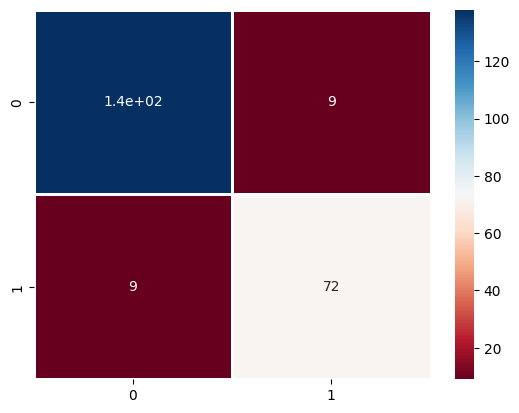

In [58]:
normal_data = confusion_matrix (y_test_encoded, y_pred2)
sns.heatmap(normal_data,annot=True, cmap='RdBu', linewidths=.9)

12) using a confussion matrix and then applying heatmap to see the accuracy of logistic regression model on unscaled data.

In [59]:
print("accuracy on scaled data = ",acc*100,"%")
print("accuracy on unscaled/orignal data = ",acc2*100,"%")

accuracy on scaled data =  95.6140350877193 %
accuracy on unscaled/orignal data =  92.10526315789474 %


13) here you can see that the accuracy of the logistic regression model is very high "94%" on the preprocessed scaled data. on the other hand the accuracy of unscaled data is very low "36%". the difference in accuracy is about "58%"

In [60]:

if not os.path.exists('Models'):
    os.mkdir('Models')
if not os.path.exists('Scalers'):
    os.mkdir('Scalers')
joblib.dump(lr, r'Models/model.pickle')
joblib.dump(scaler, r'Scalers/scaler.pickle')

PicklingError: Can't pickle <class '__main__.LogisticRegression'>: it's not the same object as __main__.LogisticRegression

14. saving the model so we can load it again or on an other device after deploying it on the machine.